# Developer Insights
Every year stack overflow organises a survey for developers all around the world. In this notebook I have analyzed the trends for the consecutive years 2018 and 2019. This is a small contribution from my side for the readers to understand the current situation of developers all around the world.

### Importing Libraries 

In [1]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#To ignore unwanted warnings,
import warnings
warnings.simplefilter("ignore")

In [2]:
#Import data
data_19 = pd.read_csv('data/2019.csv', usecols = ['Country', 'Employment', 'EduOther', 'WorkRemote','CompTotal','MainBranch',
                                                    'Age','Gender','JobSat','DevType','LanguageWorkedWith']);

data_18 = pd.read_csv('data/2018.csv', usecols = ['Country', 'Employment','Student','EducationTypes','DevType',
                                                  'Age','Gender','JobSatisfaction','LanguageWorkedWith']);


Viewing the data set for 2019,

In [3]:
data_19.head()

,MainBranch,Employment,Country,EduOther,DevType,JobSat,CompTotal,WorkRemote,LanguageWorkedWith,Age,Gender
0,I am a student who is learning to code,"Not employed, and not looking for work",United Kingdom,"Taught yourself a new language, framework, or ...",NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,14.0,Man
1,I am a student who is learning to code,"Not employed, but looking for work",Bosnia and Herzegovina,Taken an online course in programming or softw...,"Developer, desktop or enterprise applications;...",NaN,NaN,NaN,C++;HTML/CSS;Python,19.0,Man
2,"I am not primarily a developer, but I write co...",Employed full-time,Thailand,"Taught yourself a new language, framework, or ...","Designer;Developer, back-end;Developer, front-...",Slightly satisfied,23000.0,Less than once per month / Never,HTML/CSS,28.0,Man
3,I am a developer by profession,Employed full-time,United States,Taken an online course in programming or softw...,"Developer, full-stack",Slightly satisfied,61000.0,Less than once per month / Never,C;C++;C#;Python;SQL,22.0,Man
4,I am a developer by profession,Employed full-time,Ukraine,Taken an online course in programming or softw...,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,NaN,A few days each month,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,30.0,Man


Viewing year 2018 data,

In [4]:
data_18.head()

,Country,Student,Employment,DevType,JobSatisfaction,EducationTypes,LanguageWorkedWith,Gender,Age
0,Kenya,No,Employed part-time,Full-stack developer,Extremely satisfied,"Taught yourself a new language, framework, or ...",JavaScript;Python;HTML;CSS,Male,25 - 34 years old
1,United Kingdom,No,Employed full-time,Database administrator;DevOps specialist;Full-...,Moderately dissatisfied,"Taught yourself a new language, framework, or ...",JavaScript;Python;Bash/Shell,Male,35 - 44 years old
2,United States,No,Employed full-time,Engineering manager;Full-stack developer,Moderately satisfied,NaN,NaN,NaN,NaN
3,United States,No,Employed full-time,Full-stack developer,Neither satisfied nor dissatisfied,Completed an industry certification program (e...,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,Male,35 - 44 years old
4,South Africa,"Yes, part-time",Employed full-time,Data or business analyst;Desktop or enterprise...,Slightly satisfied,Taken a part-time in-person course in programm...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Male,18 - 24 years old


In [5]:
print(data_19.shape , data_18.shape)

(88883, 11) (98855, 9)


## 1. Year on Year comparision of Total Developers

In this section we would look upon our top 10 countries responds of developers for the year 2018 and 2019

In [6]:
from utils import data_handle #For preprocessing

In [7]:
#Make dataframe of developers w.r.t. their countries
df = data_handle.make_country_df(data_19, data_18)
df.sort_values(by=['2019'], inplace=True,ascending = True)

In [8]:
#Converting the columns into percentage
columns = ['2018','2019']
for col in df[columns]:
    df[col] = 100*(df[col]/df[col].sum())

In [9]:
#Top 10 countries w.r.t. 2019 data percentage arranged in ascending order
data = df[df['2019']>2]
data

,Country,2019,2018
102,Netherlands,2.106886,1.905858
8,Australia,2.163983,2.366254
116,Poland,2.190248,2.055337
22,Brazil,2.213087,2.185384
52,France,2.724677,2.741446
29,Canada,3.856343,3.910372
154,United Kingdom,6.511362,7.681729
55,Germany,6.666667,6.366313
66,India,10.317460,11.633956
156,United States,23.840356,24.791103


We now obtain percentage of developers for top 10 Country for each year stored in dataframe named *data*. Further Plotting histogram,

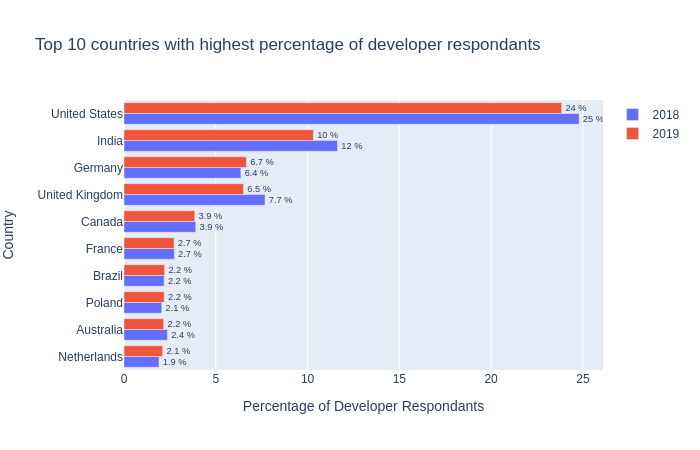

In [10]:
fig = go.Figure()
fig.add_trace(go.Bar(y=data.Country, x=data['2018'],orientation = 'h',
                name='2018', text=data['2018']))

fig.add_trace(go.Bar(y=data.Country, x=data['2019'],orientation = 'h',
                name='2019', text=data['2019']))


fig.update_traces(texttemplate='%{text:.2s} %', textposition='outside')
fig.update_layout(
    title="Top 10 countries with highest percentage of developer respondants",
    yaxis_title="Country",
    xaxis_title="Percentage of Developer Respondants",
    
)
fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

fig.show('png')

## 2. Types of Developer for each year

In this section we will analyze the developers responds for each year to analyze the growth and distribution. 

In [11]:
data19, data18 = data_handle.make_dev(data_19, data_18) #making dataframe for each year

In [12]:
data19.head()#view the dataset created

,MainBranch,Employment,Country,EduOther,DevType,JobSat,CompTotal,WorkRemote,LanguageWorkedWith,Age,Gender
0,I am a student who is learning to code,"Not employed, but looking for work",Bosnia and Herzegovina,Taken an online course in programming or softw...,"Developer, desktop or enterprise applications",NaN,NaN,NaN,C++;HTML/CSS;Python,19.0,Man
1,I am a student who is learning to code,"Not employed, but looking for work",Bosnia and Herzegovina,Taken an online course in programming or softw...,"Developer, front-end",NaN,NaN,NaN,C++;HTML/CSS;Python,19.0,Man
2,"I am not primarily a developer, but I write co...",Employed full-time,Thailand,"Taught yourself a new language, framework, or ...",Designer,Slightly satisfied,23000.0,Less than once per month / Never,HTML/CSS,28.0,Man
3,"I am not primarily a developer, but I write co...",Employed full-time,Thailand,"Taught yourself a new language, framework, or ...","Developer, back-end",Slightly satisfied,23000.0,Less than once per month / Never,HTML/CSS,28.0,Man
4,"I am not primarily a developer, but I write co...",Employed full-time,Thailand,"Taught yourself a new language, framework, or ...","Developer, front-end",Slightly satisfied,23000.0,Less than once per month / Never,HTML/CSS,28.0,Man


### Cleaning the developer columns in each year

In [13]:
data19.DevType.replace({'Developer, front-end': 'Front-end developer','Developer, full-stack':'Full-stack developer',
                        'Developer, back-end':'Back-end developer', 'Developer, mobile' : 'Mobile developer',
                        'Engineer, data':'Data Engineer','Educator':'Educator or academic researcher',
                        'Developer, game or graphics':'Game or graphics developer',
                        'Developer, QA or test':'QA or test developer','Academic researcher':'Educator or academic researcher',
                        'Developer, embedded applications or devices':'Embedded applications or devices developer',
                        'Scientist':'Other','Senior executive/VP':'Other','Engineer, site reliability':'Other',
                        'Developer, desktop or enterprise applications':'Desktop or enterprise applications developer'},inplace = True)

In [14]:
data18.DevType.replace({'C-suite executive (CEO, CTO, etc.)':'Other',},inplace = True)

## Visualizing the developer types

After cleaning we visualize the dataframes (data19 and data18) with histogram plot,

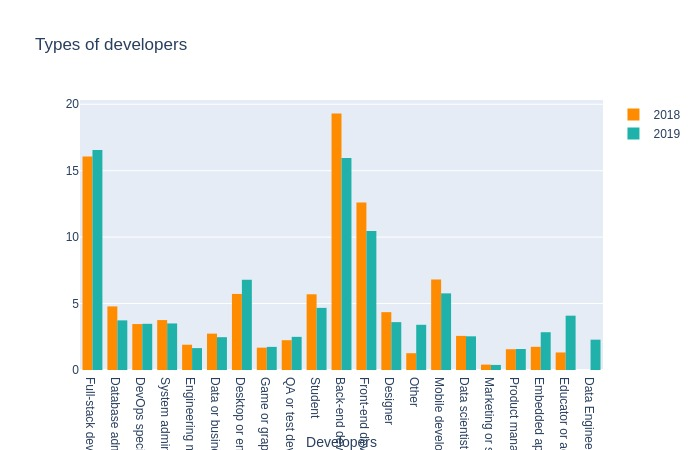

In [15]:
#plotly graph objects figures
fig = go.Figure()
fig.add_trace(go.Histogram(histnorm='percent',x=data18.DevType, marker=dict(color="DarkOrange"),
                name='2018'))

fig.add_trace(go.Histogram(histnorm='percent',x=data19.DevType, marker=dict(color="LightSeaGreen"),
                name='2019'))


fig.update_layout(
    title="Types of developers",
    xaxis_title="Developers",    
)

fig.update_layout(
    autosize=False,
    width=1200,
    height=650,)

fig.show('jpeg')

## 3. Developers at country level

We can have a quick look of missing data, to decide how to further preprocess with the following function and uncommenting by removing '#' from below two cells.

In [16]:
#data_handle.plot_missing(data_19)#Check Missing data in 2019

In [17]:
#data_handle.plot_missing(data_18)#Check Missing data in 2018

In [18]:
#Create column with values of the corresponding year
data19['year'] = '2019'
data18['year'] = '2018'

In [19]:
#Create Sunburst data for the sunburst plot 
sun_data19 = pd.DataFrame(data19.groupby(['Country', 'year','DevType','Gender'], ).size())
sun_data19 = sun_data19.rename(columns={0: "Counts"})
sun_data19.reset_index(inplace=True)

sun_data18 = pd.DataFrame(data18.groupby(['Country', 'year','DevType','Gender'], ).size())
sun_data18 = sun_data18.rename(columns={0: "Counts"})
sun_data18.reset_index(inplace=True)

In [20]:
#Cleaning the data
sun_data19.Gender.replace({'Man':'Male','Woman':'Female',
                           'Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Woman;Man':'Other',
                           'Man;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Woman;Man;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Woman;Non-binary, genderqueer, or gender non-conforming':'Other',}, inplace = True)

sun_data18.Gender.replace({'Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Male;Non-binary, genderqueer, or gender non-conforming':'Other',
                          'Female;Male':'Other','Transgender':'Other','Female;Transgender':'Other',
                          'Transgender;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Female;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Male;Transgender':'Other','Female;Transgender;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Female;Male;Transgender':'Other','Female;Male;Non-binary, genderqueer, or gender non-conforming':'Other',
                           'Male;Transgender;Non-binary, genderqueer, or gender non-conforming':'Other'
                          },inplace = True)

In [21]:
#Filtering top 5 Countries referenced from the first plot
countries = ['India','United States','United Kingdom','Canada','Germany']
df_sunburst19 = pd.DataFrame(sun_data19[sun_data19.Country.isin(countries)])
df_sunburst18 = pd.DataFrame(sun_data18[sun_data18.Country.isin(countries)])

In [22]:
df_sunburst19.head()

,Country,year,DevType,Gender,Counts
975,Canada,2019,Back-end developer,Male,1307
976,Canada,2019,Back-end developer,Other,1
977,Canada,2019,Back-end developer,Other,9
978,Canada,2019,Back-end developer,Female,105
979,Canada,2019,Back-end developer,Other,1


In [23]:
#Change the count column to percentages
df_sunburst19['Counts'] = 100*(df_sunburst19['Counts']/df_sunburst19['Counts'].sum())
df_sunburst18['Counts'] = 100*(df_sunburst18['Counts']/df_sunburst18['Counts'].sum())

### Displaying the sunburst
This is a hierarichal display of Country > Types of Developers > Gender. 

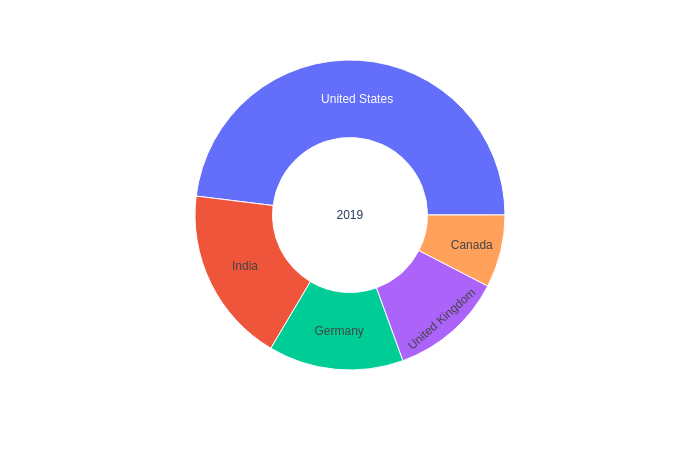

In [24]:
fig1 = px.sunburst(df_sunburst19, path=['year','Country', 'DevType', 'Gender'], values='Counts',
    maxdepth=2)
fig1.update_layout(autosize=False,width=650,height=650)
fig1.show('png')#delete png while running, this is done to display in github(change fig.show('png') to fig.show())

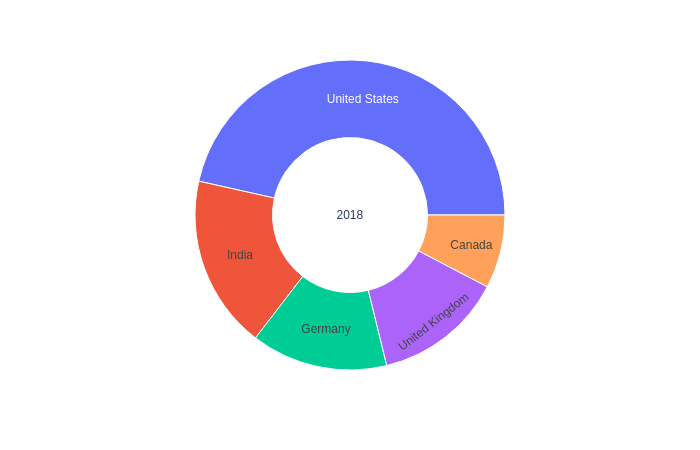

In [25]:
fig2 = px.sunburst(df_sunburst18, path=['year','Country', 'DevType', 'Gender'], values='Counts',
    maxdepth=2)
fig2.update_layout(autosize=False,width=650,height=650)
fig2.show('png')#delete png while running this is done to display in github

## 4. Languages used in 2018-2019
Analyzing the language trends for the year 2018-2019.

In [26]:
#Language dataframe
lang19, lang18 = data_handle.make_lang(data_19, data_18)

In [27]:
lang19.LanguageWorkedWith.replace({"Bash/Shell/PowerShell":"Bash/Shell",
                                 }, inplace = True)

In [28]:
lang19.head()

,MainBranch,Employment,Country,EduOther,DevType,JobSat,CompTotal,WorkRemote,LanguageWorkedWith,Age,Gender
0,I am a student who is learning to code,"Not employed, and not looking for work",United Kingdom,"Taught yourself a new language, framework, or ...",NaN,NaN,NaN,NaN,HTML/CSS,14.0,Man
1,I am a student who is learning to code,"Not employed, and not looking for work",United Kingdom,"Taught yourself a new language, framework, or ...",NaN,NaN,NaN,NaN,Java,14.0,Man
2,I am a student who is learning to code,"Not employed, and not looking for work",United Kingdom,"Taught yourself a new language, framework, or ...",NaN,NaN,NaN,NaN,JavaScript,14.0,Man
3,I am a student who is learning to code,"Not employed, and not looking for work",United Kingdom,"Taught yourself a new language, framework, or ...",NaN,NaN,NaN,NaN,Python,14.0,Man
4,I am a student who is learning to code,"Not employed, but looking for work",Bosnia and Herzegovina,Taken an online course in programming or softw...,"Developer, desktop or enterprise applications;...",NaN,NaN,NaN,C++,19.0,Man


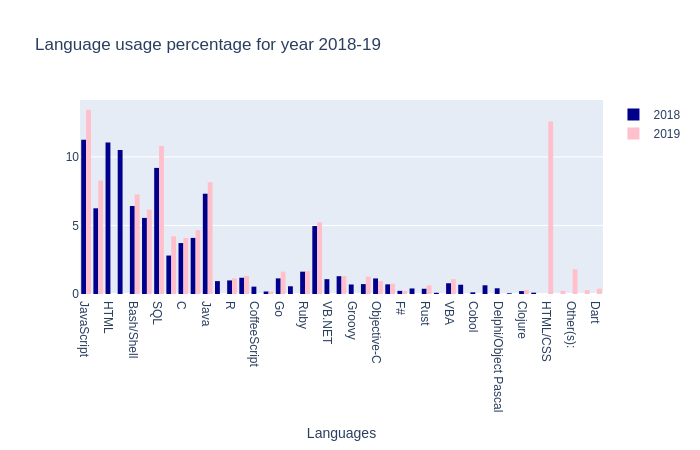

In [29]:
fig4 = go.Figure()


fig4.add_trace(go.Histogram(histnorm='percent',x=lang18.LanguageWorkedWith, marker=dict(color="DarkBlue"),
                name='2018'))

fig4.add_trace(go.Histogram(histnorm='percent',x=lang19.LanguageWorkedWith, marker=dict(color="Pink"),
                name='2019'))


fig4.update_layout(
    title="Language usage percentage for year 2018-19",
    xaxis_title="Languages",    
)

fig4.update_layout(
    autosize=False,
    width=1200,
    height=650,)

fig4.show('png')#delete png while running this is done to display in github

## 5. Skills-Training 
Here we analyze the skills acquired from various resources and their distribution.

In [30]:
edu19 , edu18 = data_handle.make_edu(data_19,data_18)

In [31]:
#edu19.EduOther.value_counts()

In [32]:
#edu18.EducationTypes.value_counts()

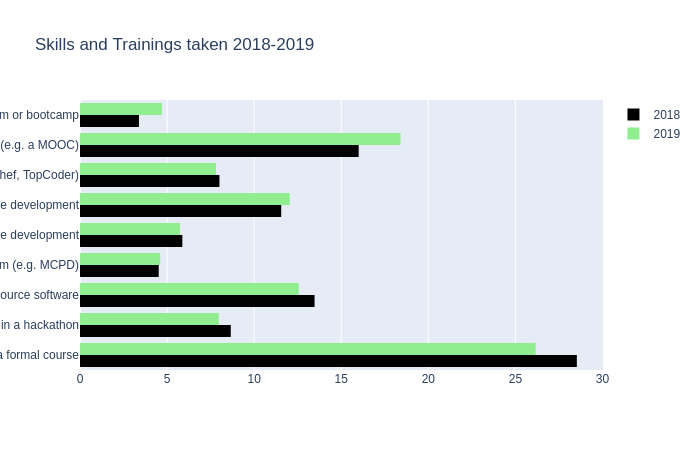

In [36]:
fig5 = go.Figure()
fig5.add_trace(go.Histogram(histnorm='percent',y=edu18.EducationTypes, marker=dict(color="Black"),
                name='2018'))

fig5.add_trace(go.Histogram(histnorm='percent',y=edu19.EduOther, marker=dict(color="LightGreen"),
                name='2019'))

fig5.update_layout(
    title="Skills and Trainings taken 2018-2019"   
)

fig5.update_layout(
    autosize=False,
    width=1200,
    height=650,
)

fig5.show('png')#delete png while running this is done to display in github

## End

Thank you!<br>
Author: Pratik Kumar